In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
##Generate fake data
target=45
real_error = 5 ## attraction of 5 degrees
distractor_dit = 10
response_cw = np.random.normal(target-real_error, 5, 1000)
response_ccw = np.random.normal(target + real_error, 5, 1000)

cw=pd.DataFrame({'response':response_cw})
cw['target'] = 45
cw['orient'] = 'cw'
cw['distractor'] = target - distractor_dit

ccw=pd.DataFrame({'response':response_ccw})
ccw['target'] = 45
ccw['orient'] = 'ccw'
ccw['distractor'] = target + distractor_dit

df=pd.concat([cw, ccw], ignore_index=True)
df['error'] = df['target'] - df['response']
df.head(10)

,response,target,orient,distractor,error
0,45.679663,45,cw,35,-0.679663
1,46.106307,45,cw,35,-1.106307
2,39.757976,45,cw,35,5.242024
3,35.998271,45,cw,35,9.001729
4,29.523987,45,cw,35,15.476013
5,42.062580,45,cw,35,2.937420
6,37.340178,45,cw,35,7.659822
7,40.280024,45,cw,35,4.719976
8,43.952021,45,cw,35,1.047979
9,38.105713,45,cw,35,6.894287


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


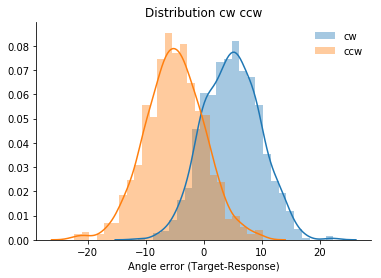

In [24]:
sns.distplot(df.loc[df['orient']=='cw', 'error'], label='cw')
sns.distplot(df.loc[df['orient']=='ccw', 'error'], label='ccw')
plt.title('Distribution cw ccw')
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('Angle error (Target-Response)')
plt.show()

In [ ]:
## Check the interference effects function

In [31]:
def circ_dist(a1,a2):
    ## Returns the minimal distance in angles between to angles 
    op1=abs(a2-a1)
    angs=[a1,a2]
    op2=min(angs)+(360-max(angs))
    options=[op1,op2]
    return min(options)




def Interference_effects(target, response, reference):
    #input list of target, list of responses and list of references
    #Error_interference; positive for attraction and negative for repulsion
    #######
    #Decimals to get
    decimals=2
    ####
    interferences=[]
    for i in range(0, len(target)):
        angle_err_abs=abs(target[i] - response[i])
        if circ_dist(np.array(response)[i], np.array(reference)[i])<=circ_dist(np.array(target)[i], np.array(reference)[i]):
            Err_interference=round( angle_err_abs, decimals) 
        else:
            Err_interference=round( -angle_err_abs, decimals)

        interferences.append(Err_interference)
    
    return interferences



values = Interference_effects(   list(df['target']),   list(df['response']),  list(df['distractor'])  )
print( round(np.mean(values)) )

df['interference_error'] = values


5.0


In [39]:
means_cw_ccw={}

for ori in ['cw', 'ccw']:
    mean = round(df.loc[ df['orient']==ori,  'error'].mean(), 3)
    means_cw_ccw[ori] = mean

    
print(means_cw_ccw)


cw_ccw_distance=[]

for i in df.index:
    or_ = df.loc[i, 'orient']
    if or_ == 'cw':
        or_cont = 'ccw'
    elif or_ =='ccw':
        or_cont = 'cw' 
    else:
        print('Error')
    idx =  or_cont
    #
    if or_ == 'ccw':
        cw_ccw_distance.append( df.loc[i, 'error'] - means_cw_ccw[idx] )  
    elif or_ =='cw':
        cw_ccw_distance.append( means_cw_ccw[idx] - df.loc[i, 'error'] )  
    else:
        print('Error')
    


print( round(np.mean(cw_ccw_distance)) )
df['error distance'] =cw_ccw_distance


{'cw': 4.843, 'ccw': -5.014}
10.0


In [ ]:
## Check dist err method 


##### DISTANCE TO MEAN OF CW AND CCW as a measure
means_cw_ccw={}

for ori in ['cw', 'ccw']:
    mean = round(df.loc[ df['cw_ccw']==ori,  'error'].mean(), 3)
    means_cw_ccw[ori] = mean
                

        
cw_ccw_distance=[]

for i in df.index:
    or_ = df.loc[i, 'cw_ccw']
    if or_ == 'cw':
        or_cont = 'ccw'
    elif or_ =='ccw':
        or_cont = 'cw' 
    else:
        print('Error')
    idx =  str(df.loc[i, 'subject'])+ '_' + str(df.loc[i, 'r_T']) + '_' +str(df.loc[i, 'dist_T_NT']) +'_' +str(df.loc[i, 'delay']) +'_'  + or_cont
    #
    if or_ == 'ccw':
        cw_ccw_distance.append(df.loc[i, 'A_err'] - means_cw[idx] )  
    elif or_ =='cw':
        cw_ccw_distance.append( means_cw[idx] - df.loc[i, 'A_err'])  
    else:
        print('Error')
    

